In [1]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from beakerx import *
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/home/xupeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_style(styles[2])
sns.set_context(contexts[2])

In [3]:
cd /home/xupeng/projects/synapse

/home/xupeng/projects/synapse


In [4]:
ls data/crack/  #只要align_0_*_*

align_0_15_1.hdf  im015.png              im048_reverse0.png
align_0_15_2.hdf  im015_reverse0.png     im048_warp0_ip_db.png
align_0_48_1.hdf  im015_warp0_ip_db.png  im048_warp0.png
align_0_48_2.hdf  im015_warp0.png        im048_warped1.png
align_1_15_1.hdf  im015_warped1.png      im048_warped2.png
align_1_15_2.hdf  im015_warped2.png      im049.png
align_1_48_1.hdf  im016.png              im15_prediction1.png
align_1_48_2.hdf  im047.png              im15_prediction2.png
im014.png         im048_p1.png           im48_prediction1.png
im015_p1.png      im048_p2.png           im48_prediction2.png
im015_p2.png      im048.png              im_A+_v2_200_nocrack.h5


with h5py.File('data/images/im_A+_v2_200.h5') as f:
    imA_plus = f['main'][:]

#### 读没有reverse的原数据，不是reverse之后的

In [24]:
with h5py.File('data/reverse/9.7/im_A+_v2_200_nocrack_pred.h5') as f:
    prediction_14 = f['main'][14]
    prediction_47 = f['main'][47]

In [25]:
with h5py.File('data/reverse/9.7/results_new_A+_v2_200.h5') as f:
    print( f['main'][:].shape)

(125, 1250, 1250)


imA_plus.shape

In [26]:
from scipy.ndimage.measurements import label
from skimage.measure import regionprops

In [27]:
def get_roi(image,anotherimage):
    img = np.copy(image)
    img_ = np.copy(image)
    labels = label(image)
    print (np.unique(labels[0]))
    img[np.where(labels[0]==1)] =0
    img_[np.where(labels[0]==2)] =0
    anoimg = np.copy(anotherimage)
    anoimg_ = np.copy(anotherimage)
    anoimg[np.where(labels[0]==1)] =0
    anoimg_[np.where(labels[0]==2)] =0
    return anoimg,anoimg_

In [28]:
scipy.misc.imread('data/crack/im048_warp0.png').shape

(1741, 1912)

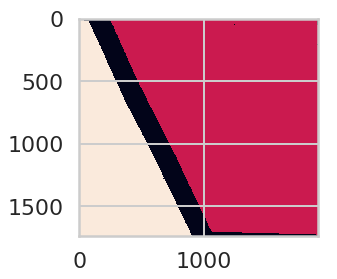

In [29]:
imshow(label(scipy.misc.imread('data/crack/im015_warp0.png'))[0])

In [30]:
scipy.misc.imread('data/crack/im015_warp0.png').shape

(1741, 1912)

In [31]:
prediction_14.T.shape

(1741, 1912)

### save four images to use matlab to realign

In [33]:
scipy.misc.imsave('data/crack/9.7/im15_prediction1.png',get_roi(scipy.misc.imread('data/crack/im015_warp0.png'),prediction_14.T)[1])
scipy.misc.imsave('data/crack/9.7/im15_prediction2.png',get_roi(scipy.misc.imread('data/crack/im015_warp0.png'),prediction_14.T)[0])
scipy.misc.imsave('data/crack/9.7/im48_prediction1.png',get_roi(scipy.misc.imread('data/crack/im048_warp0.png'),prediction_47.T)[1])
scipy.misc.imsave('data/crack/9.7/im48_prediction2.png',get_roi(scipy.misc.imread('data/crack/im048_warp0.png'),prediction_47.T)[0])

[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]


### now do some matlab thing

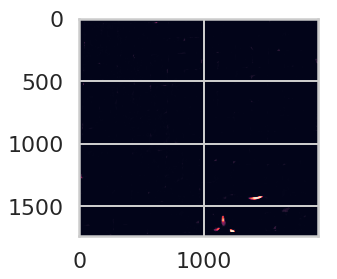

In [34]:
imshow(scipy.misc.imread('data/crack/im015_reverse0.png'))

[0 1 2]


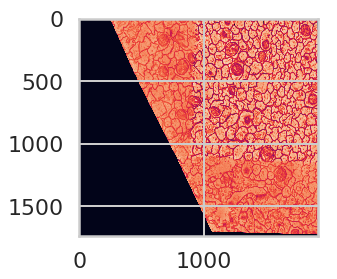

In [35]:
imshow(get_roi(scipy.misc.imread('data/crack/im015_warp0.png'),scipy.misc.imread('data/crack/im015_warp0.png'))[1])

[0 1 2]


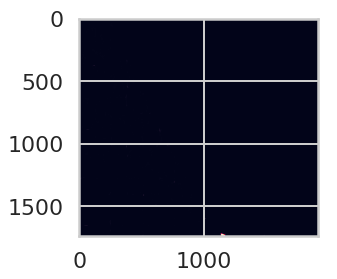

In [36]:
imshow(get_roi(scipy.misc.imread('data/crack/im015_warp0.png'),prediction_14.T)[0])

[0 1 2]


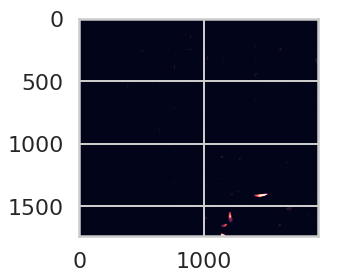

In [37]:
imshow(get_roi(scipy.misc.imread('data/crack/im015_warp0.png'),prediction_14.T)[1])

[0 1 2]


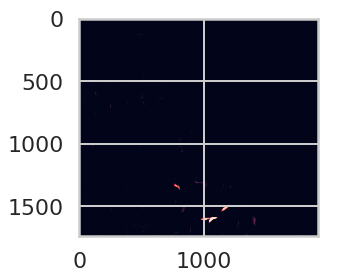

In [38]:
imshow(get_roi(scipy.misc.imread('data/crack/im048_warp0.png'),prediction_47.T)[0])

[0 1 2]


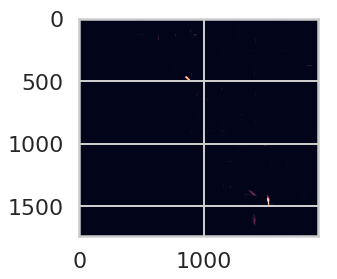

In [39]:
imshow(get_roi(scipy.misc.imread('data/crack/im048_warp0.png'),prediction_47.T)[1])

In [40]:
imshow(imA_plus[47].T,cmap='gray')

NameError: name 'imA_plus' is not defined

In [24]:
scipy.misc.imread('data/crack/im015.png').shape

(1741, 1912)

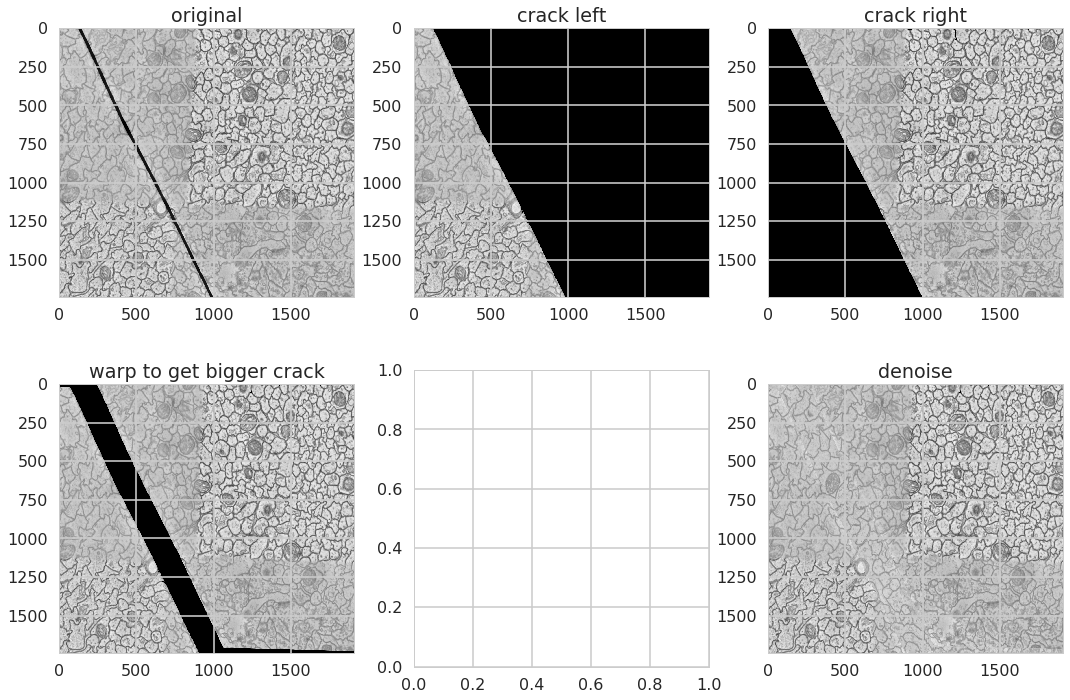

In [26]:
fig,ax=plt.subplots(2,3,figsize=(18,12))
ax[0,0].set_title('original')
ax[0,0].imshow(scipy.misc.imread('data/crack/im015.png'),cmap='gray')
ax[0,1].set_title('crack left')
ax[0,1].imshow(scipy.misc.imread('data/crack/im015_p2.png'),cmap='gray')
ax[0,2].set_title('crack right')
ax[0,2].imshow(scipy.misc.imread('data/crack/im015_p1.png'),cmap='gray')
ax[1,0].set_title('warp to get bigger crack')
ax[1,0].imshow(scipy.misc.imread('data/crack/im015_warp0.png'),cmap='gray')
#ax[1,1].set_title('interpolation')
#ax[1,1].imshow(scipy.misc.imread('data/crack/im015_warp0_ip.png'),cmap='gray')
ax[1,2].set_title('denoise')
ax[1,2].imshow(scipy.misc.imread('data/crack/im015_warp0_ip_db.png'),cmap='gray')

#### 8.8 final crack plus reverse

In [124]:
with h5py.File('data/cremi/gt-syn/syn_A_v2_200.h5') as f:
    print (f['main'][:].shape)

(153, 1842, 1727)


In [125]:
with h5py.File('data/results/volume_B+_pred.h5') as f:
    print (f['main'][:].shape)

(153, 1937, 2898)


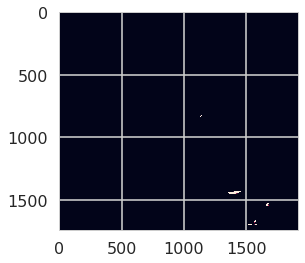

In [89]:
imshow(scipy.misc.imread('data/prediction/im015_reverse0.png'))

In [83]:
scipy.misc.imread('data/prediction/im048_reverse0.png').shape

(1741, 1912)

### 把用matlab跑出来 的两张加回去到reverse之前的，然后再统一reverse！

In [49]:
with h5py.File('data/reverse/9.7/im_A+_v2_200_nocrack_pred.h5') as f:
    resultsA_reverse1 = f['main'][:]
resultsA_reverse1[14] = scipy.misc.imread('data/crack/im015_reverse0.png').T
resultsA_reverse1[47] = scipy.misc.imread('data/crack/im048_reverse0.png').T
with h5py.File('data/reverse/9.7/im_A+_v2_200_pred_add_crack.h5') as f:
    f.create_dataset('main',data=resultsA_reverse1)

In [50]:
resultsA_reverse1.shape

(153, 1912, 1741)

In [40]:
np.unique(resultsA_origin,return_counts=True)

(array([  8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
         21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
         34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
         47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
         60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
        138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
        151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
        177, 178, 179, 180, 181, 182, 183, 184, 185

In [175]:
np.unique(scipy.misc.imread('data/crack/im015_reverse0.png').T)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  49,  50,  51,  52,  53,
        55,  56,  57,  58,  59,  60,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  80,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153,
       154, 155, 156, 157, 158, 159, 161, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 19

In [36]:
resultsA_origin[14] = scipy.misc.imread('data/crack/im015_reverse0.png').T
resultsA_origin[47] = scipy.misc.imread('data/crack/im048_reverse0.png').T

In [92]:
with h5py.File('data/results/volume_A+_pred_new.h5') as f:
    f.create_dataset('main',data=resultsA_origin)

In [158]:
with h5py.File('data/results/results_A+_v2_200.h5') as f:
    reverse_A = f['main'][:]
with h5py.File('data/results/results_B+_v2_200.h5') as f:
    reverse_B = f['main'][:]
with h5py.File('data/results/results_C+_v2_200.h5') as f:
    reverse_C = f['main'][:]

In [167]:
with h5py.File('data/results/results_new_A+_v2_200.h5') as f:
    reverse_A = f['main'][:]

In [168]:
reverse_A = reverse_A.astype('uint8')

In [177]:
reverse_A[reverse_A!=0]=255

In [178]:
np.unique(reverse_A)

array([  0, 255], dtype=uint8)

In [179]:
with h5py.File('data/results/reverse_prediction_A+_new_v2_200.h5') as f:
    f.create_dataset('main',data=reverse_A)

In [160]:
reverse_A = reverse_A.astype('uint8')
reverse_B = reverse_B.astype('uint8')
reverse_C = reverse_C.astype('uint8')

In [166]:
with h5py.File('data/results/reverse_prediction_A+_v2_200.h5') as f:
    f.create_dataset('main',data=reverse_A)
with h5py.File('data/results/reverse_prediction_B+_v2_200.h5') as f:
    f.create_dataset('main',data=reverse_B)
with h5py.File('data/results/reverse_prediction_C+_v2_200.h5') as f:
    f.create_dataset('main',data=reverse_C)

In [149]:
np.unique(resultsC_origin)

array([  0, 255], dtype=uint8)

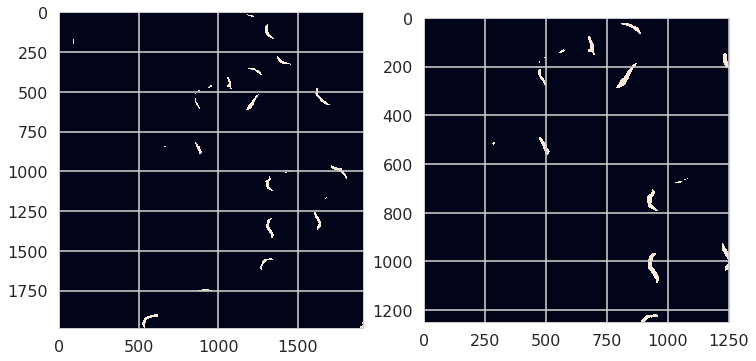

In [165]:
lind = 50
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(resultsC_origin[lind+14])
ax[1].imshow(reverse_C[lind])

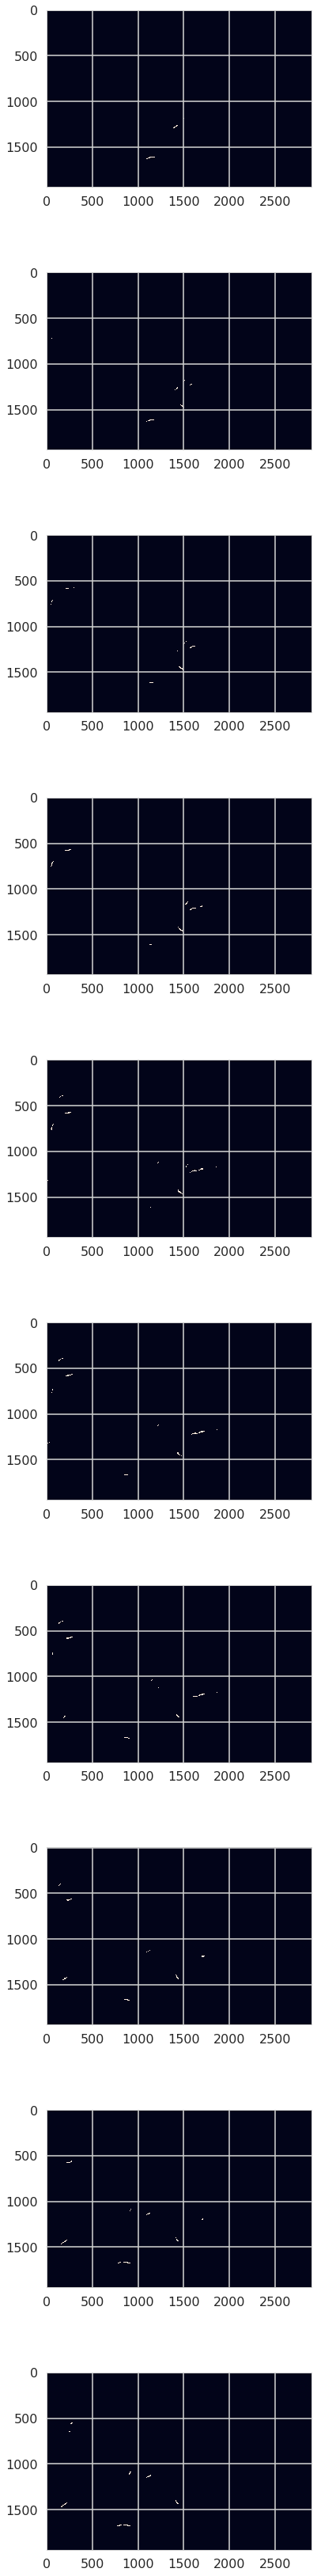

In [141]:
fig,ax=plt.subplots(10,1,figsize=(6,60))
for i in range(10):
    ax[i].imshow(resultsB_origin[i+20])

### find big crack, extract left and right, try reverse them

In [163]:
tttt = scipy.misc.imread('data/crack/im048_warp0.png')
tttt.shape
from scipy.ndimage.measurements import label
from skimage.measure import regionprops
label = label(tttt)
#props = regionprops(label)

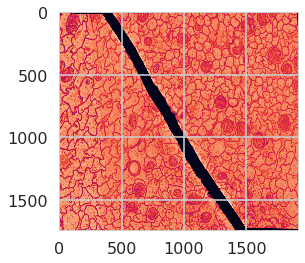

In [164]:
imshow(tttt)

In [167]:
np.unique(label[0])

array([0, 1, 2], dtype=int32)

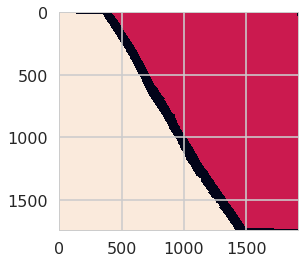

In [165]:
imshow(label[0])

In [131]:
tttt[np.where(label[0]==1)] =0

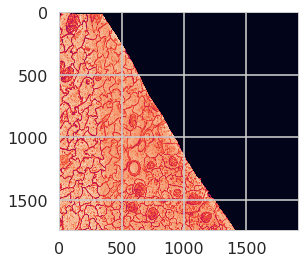

In [132]:
imshow(tttt)

In [133]:
scipy.misc.imsave('data/crack/im048_warped2.png',tttt)

In [102]:
ls data/crack/

align_0_15_1.hdf  im015.png               im048_p1.png
align_0_15_2.hdf  im015_warp0_ip_db.png   im048_p2.png
align_0_48_1.hdf  im015_warp0_ip.png*     im048.png
align_0_48_2.hdf  im015_warp0.png         im048_warp0_ip_db.png
align_1_15_1.hdf  im015_warp0_seg.png     im048_warp0_ip.png
align_1_15_2.hdf  im015_warp0_warp.png    im048_warp0.png
align_1_48_1.hdf  im015_warp1.png*        im048_warp0_seg.png
align_1_48_2.hdf  im015_warped0left.png   im048_warp0_warp.png
im014.png         im015_warped0right.png  im049.png
im015_p1.png      im016.png               im_A+_v2_200_nocrack.h5
im015_p2.png      im047.png


### test to rewarp on these two images
<span class="mark">and compare with im015_p1 im015_p2</span>
<span class="mark">or merge them togwther, so directly compare with im014.png</span>

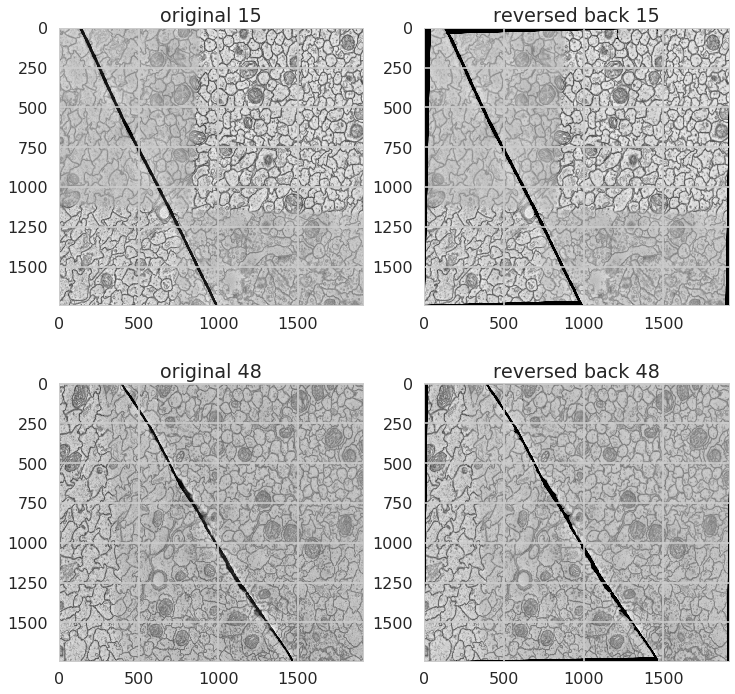

In [41]:
fig,ax=plt.subplots(2,2,figsize=(12,12))
ax[0,0].set_title('original 15')
ax[0,0].imshow(scipy.misc.imread('data/crack/im015.png'),cmap='gray')
ax[0,1].set_title('reversed back 15')
ax[0,1].imshow(scipy.misc.imread('data/crack/im015_reverse0.png'),cmap='gray')
ax[1,0].set_title('original 48')
ax[1,0].imshow(scipy.misc.imread('data/crack/im048.png'),cmap='gray')
ax[1,1].set_title('reversed back 48')
ax[1,1].imshow(scipy.misc.imread('data/crack/im048_reverse0.png'),cmap='gray')

In [33]:
zerosarr = np.zeros([tttt.shape[0],tttt.shape[1]])
zerosarr[tttt==0] =1

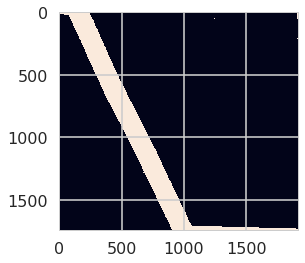

In [34]:
imshow(zerosarr)

In [36]:
with h5py.File('data/crack/align_0_15_1.hdf') as f:
    crack15_warp_1_rotate,crack15_warp_1_distance =  f['main'][:]

In [49]:
with h5py.File('data/crack/align_0_15_1.hdf') as f:
    print (f['main'][:].shape)
    ttwarp = f['main'][:,:,1]
    print (ttwarp)

(2, 3, 3)
[[0.         1.         0.        ]
 [0.01522449 0.99211303 0.        ]]


In [35]:
import cv2

In [38]:
crack15_warp_1_rotate

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [39]:
crack15_warp_1_distance

array([[ 9.52379685e-01,  1.52244946e-02,  8.63155689e+01],
       [ 2.58770874e-02,  9.92113028e-01, -4.67117425e+01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

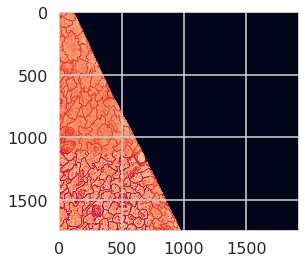

In [47]:
imshow(scipy.misc.imread('data/crack/im015_p2.png'))

In [69]:
ttwarp

array([[0.        , 1.        , 0.        ],
       [0.01522449, 0.99211303, 0.        ]])

In [67]:
tttwarp = np.float32([[1,0,0],
                      [0,1.1,0]])

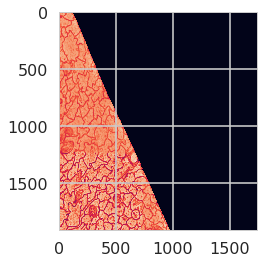

In [72]:
imshow(cv2.warpAffine(scipy.misc.imread('data/crack/im015_p2.png'),
               tttwarp,scipy.misc.imread('data/crack/im015_p2.png').shape))

In [63]:
with h5py.File('data/crack/align_0_15_2.hdf') as f:
    print (f['main'][:])

[[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 9.45724578e-01  1.99284450e-02 -4.09776844e+01]
  [ 2.49623991e-02  9.91341648e-01  1.78880319e+01]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]]


In [119]:
with h5py.File('data/compare/compare_A.hdf') as f:
    origin_A = f['origin'][:]
    reverse_A = f['reverse'][:]
with h5py.File('data/compare/compare_B.hdf') as f:
    origin_B = f['origin'][:]
    reverse_B = f['reverse'][:]
with h5py.File('data/compare/compare_C.hdf') as f:
    origin_C = f['origin'][:]
    reverse_C =f['reverse'][:]

In [120]:
reverse_C.shape

(125, 1250, 1250)

In [58]:
np.unique(origin_A)

array([  0, 604, 741, 743, 744, 745, 746, 747, 748, 749, 750, 752, 753,
       754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 766, 767,
       768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780,
       781, 782, 783, 786, 788, 789, 790, 791, 792, 793, 794, 795, 796,
       797, 799, 800, 801, 802, 803, 804, 805, 807, 808, 809, 810, 811,
       812, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825,
       828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840,
       841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853,
       854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866,
       867, 869, 870, 874, 878, 881, 884], dtype=uint64)

In [122]:
with h5py.File('data/public/sample_A_padded_20160501.hdf') as f:
    origin_A_ = f['volumes/labels/clefts'][:]
with h5py.File('data/public/sample_B_padded_20160501.hdf') as f:
    origin_B_ = f['volumes/labels/clefts'][:]
with h5py.File('data/public/sample_C_padded_20160501.hdf') as f:
    origin_C_ = f['volumes/labels/clefts'][:]

In [181]:
with h5py.File('data/public/sample_A_padded_20160501.hdf') as f:
    with h5py.File('results/visualize_A_raw') as t:
        t.create_dataset('main',data= f['volumes/raw'][:])

In [180]:
with h5py.File('data/public/sample_A_padded_20160501.hdf') as f:
    f['volumes/raw']

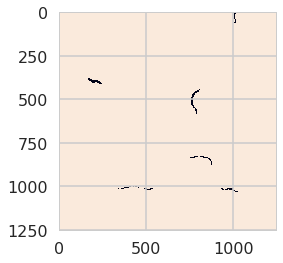

In [48]:
imshow(origin_C_[lind])

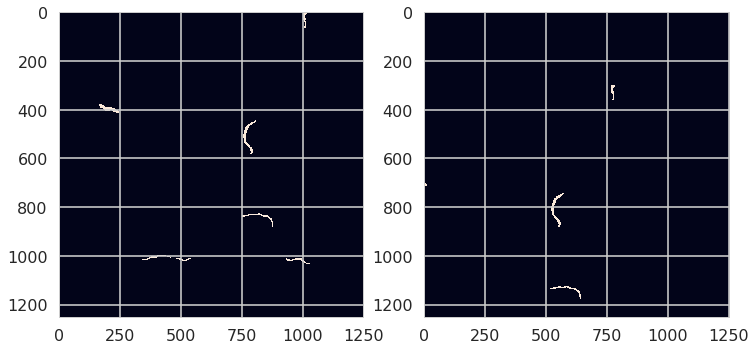

In [63]:
lind = 0
fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(origin_C[lind])
ax[1].imshow(reverse_C[lind])

(1250, 1250)


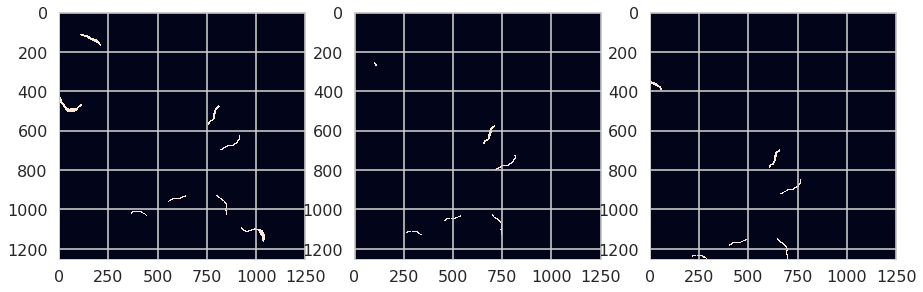

In [79]:
lind = 10
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(origin_C[lind])
zeros = np.zeros([1250,1250])
zeros[100:-100,100:-100] = origin_C[lind][:-200,200:]
print (zeros.shape)
ax[1].imshow(zeros)
ax[2].imshow(reverse_C[lind])

In [41]:
(origin_A-reverse_A).reshape(125,-1).shape

(125, 1562500)

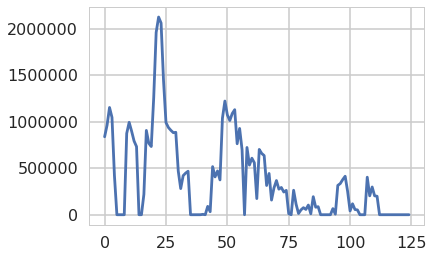

In [60]:
plt.plot(np.sum((origin_A-reverse_A).reshape(125,-1),axis=1))

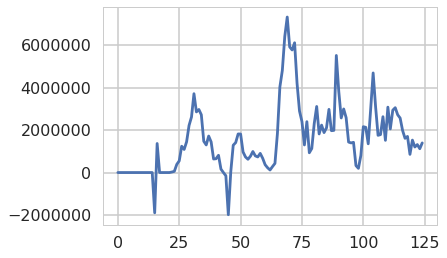

In [61]:
plt.plot(np.sum((origin_B-reverse_B).reshape(125,-1),axis=1))

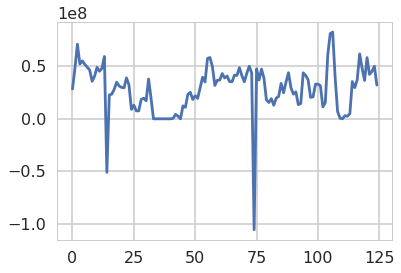

In [62]:
plt.plot(np.sum((origin_C-reverse_C).reshape(125,-1),axis=1))

In [43]:
np.unique(np.sum((origin_C-reverse_C).reshape(125,-1),axis=1))

array([ 155285286,  240688462,  241645223,  258627694,  329291359,
        337163566,  337860798,  340720640,  355374447,  355696835,
        355702134,  357283625,  359774884,  364188518,  364293704,
        365812437,  380710811,  399218006,  400835834,  404257006,
        414325966,  425766265,  428998656,  431885121,  438014354,
        443829543,  444761011,  451153675,  452081184,  452089219,
        452975083,  457400942,  458883072,  462125602,  466264714,
        466413909,  466537737,  473688177,  476974762,  480947898,
        481302197,  483949867,  495757678,  496094114,  497745920,
        500882992,  517615566,  518314264,  519634944,  522794260,
        523124253,  526585068,  527668580,  533088838,  534650243,
        535075549,  535887872,  537559232,  537821529,  541926010,
        544793504,  547301150,  554000477,  556027136,  574053016,
        575040332,  576845183,  577699840,  579407141,  582205119,
        582406870,  590479360,  607269385,  612321662,  613097